In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import randint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/cleaned_telecom_data.csv")
df.head()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.og.unq.any.p2,s2.rch.val.p6,s8.new.rev.p6,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,...,prop.og.mou.any.p2,s4.low.blnc.ins.p3,s8.rtd.mou.p3,s8.og.mou.all.p6,s7.rtd.mou.m1.m2,s7.s5.s4.day.nomou.p3,s4.rch.val.gt.30.p2,s4.std.ins.l14,s4.data.ins.l14,prop.loc.i2i.mou.og.mou.p6
0,-0.76,88.0482,3.106604,3.754955,14.0,39.29,-0.17,-0.72,1.000000,7.16,...,38.660512,7,-0.50,-0.11,0.240533,0.666667,0.0,0,0,0.494346
1,-0.98,67.5039,3.094574,5.550865,2.0,21.67,-0.32,-0.08,0.500000,1.10,...,4.773690,13,-0.11,-0.13,0.459725,0.700000,0.0,0,0,0.767617
2,-0.98,33.9248,2.324016,2.438114,3.0,30.00,-0.05,-0.09,0.384615,4.19,...,0.763355,10,-0.39,-0.12,0.111785,0.333333,0.0,1,0,0.696090
3,-0.92,82.6780,2.630749,2.858961,3.0,50.00,-0.18,1.83,0.416667,0.40,...,0.787963,11,-0.02,-0.14,1.920826,0.333333,0.0,2,0,0.437088
4,-0.97,96.8379,2.674316,2.912397,2.0,22.50,0.01,-0.04,0.222222,5.12,...,0.941257,0,-0.63,-0.02,1.728186,0.750000,0.0,1,2,0.585977


In [3]:
df.shape

(25000, 31)

In [4]:
cols = df.columns
print(cols)

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.og.unq.any.p2', 's2.rch.val.p6',
       's8.new.rev.p6', 's8.mbl.p2', 's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3',
       's7.s5.s4.day.nomou.p4', 's8.og.rev.p3', 's8.ic.mou.all.p3', 'target',
       's6.rtd.mou.p2.m2', 's1.og.hom.mou.p1', 's7.rev.p2.p6',
       's3.og.rev.all.p1', 'ds.usg.p6', 's3.new.rev.p1', 's5.rev.p1',
       'prop.og.mou.any.p2', 's4.low.blnc.ins.p3', 's8.rtd.mou.p3',
       's8.og.mou.all.p6', 's7.rtd.mou.m1.m2', 's7.s5.s4.day.nomou.p3',
       's4.rch.val.gt.30.p2', 's4.std.ins.l14', 's4.data.ins.l14',
       'prop.loc.i2i.mou.og.mou.p6'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   s6.new.rev.p2.m2            25000 non-null  float64
 1   s1.new.rev.m1               25000 non-null  float64
 2   s3.og.rev.4db.p5            25000 non-null  float64
 3   s3.new.rev.4db.p5           25000 non-null  float64
 4   s4.og.unq.any.p2            25000 non-null  float64
 5   s2.rch.val.p6               25000 non-null  float64
 6   s8.new.rev.p6               25000 non-null  float64
 7   s8.mbl.p2                   25000 non-null  float64
 8   s7.s4.day.no.mou.p2.p4      25000 non-null  float64
 9   s3.new.rev.p3               25000 non-null  float64
 10  s7.s5.s4.day.nomou.p4       25000 non-null  float64
 11  s8.og.rev.p3                25000 non-null  float64
 12  s8.ic.mou.all.p3            25000 non-null  float64
 13  target                      250

In [6]:
#churn - switch to other provider - target = 1
#not churn - remain active customer - target = 0

In [7]:
X = df.drop('target', axis=1)
y = df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.99995
Test Accuracy: 0.8092


In [11]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [12]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}


In [15]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=150, random_state=42)

In [16]:
train_pred = best_clf.predict(X_train)
test_pred = best_clf.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy after Pruning:", train_acc)
print("Test Accuracy after Pruning:", test_acc)

Train Accuracy after Pruning: 0.94145
Test Accuracy after Pruning: 0.8128


In [20]:
conf_matrix = confusion_matrix(y_test, test_pred)
class_report = classification_report(y_test, test_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[3104  333]
 [ 603  960]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3437
           1       0.74      0.61      0.67      1563

    accuracy                           0.81      5000
   macro avg       0.79      0.76      0.77      5000
weighted avg       0.81      0.81      0.81      5000



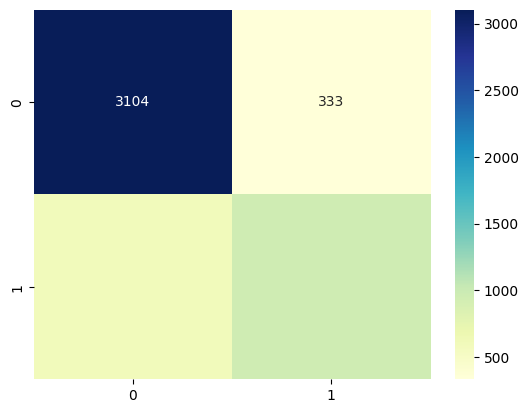

In [28]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()